In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Loading and Dataframe

In [ ]:
train_list=[]
testing_list=[]
column_header=['label','feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19']

In [ ]:
for i in range(1,128):
  str=f'/content/gdrive/MyDrive/Code Fragment Summarisation/train/train{i}.txt'
  with open(str,'r') as f:
    for line in f:
          for word in line.split():
              train_list.append(float(word))
no_of_cols=20
no_of_rows=len(train_list)
training_data=np.array(train_list)

In [ ]:
for i in range(1,128):
  str=f'/content/gdrive/MyDrive/Code Fragment Summarisation/test/test{i}.txt'
  with open(str,'r') as f:
    for line in f:
          for word in line.split():
              testing_list.append(float(word))
no_of_cols=20
no_of_rows=len(testing_list)
testing_data=np.array(testing_list)

In [ ]:
training_data

array([1., 1., 0., ..., 1., 0., 0.])

In [ ]:
testing_data

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
training_data.size

5334840

In [ ]:
testing_data.size

42340

In [ ]:
#TRAINING DATA

total_elements=training_data.size
no_of_cols=20
no_of_rows=int(total_elements/no_of_cols)
# print(no_of_rows)
training_data=training_data.reshape((no_of_rows,no_of_cols))


#TESTING DATA
total_elements=testing_data.size
no_of_cols=20
no_of_rows=int(total_elements/no_of_cols)
# print(no_of_rows)
testing_data=testing_data.reshape((no_of_rows,no_of_cols))

In [ ]:
testing_data

array([[0.        , 0.        , 0.        , ..., 0.03846154, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.07692308, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.1153846 , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.875     , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
training_data

array([[1.        , 1.        , 0.        , ..., 0.02564103, 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.05128205, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07692308, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.75      , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.875     , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
df_test=pd.DataFrame(testing_data,columns=column_header)

In [ ]:
df_train=pd.DataFrame(training_data,columns=column_header)

In [ ]:
df_test.head()

,label,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,42.0,0.0,0.038462,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.076923,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.115385,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.153846,1.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.192308,0.0,0.0


In [ ]:
df_train.head()

,label,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.025641,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.051282,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.076923,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,0.0,0.102564,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.128205,0.0,0.0


In [ ]:
y_train=df_train['label']
x_train=df_train[['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19']]



y_test=df_train['label']
x_test=df_train[['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19']]

In [ ]:
y_train

0         1.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
266737    1.0
266738    0.0
266739    1.0
266740    1.0
266741    0.0
Name: label, Length: 266742, dtype: float64

In [ ]:
x_train

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.025641,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.051282,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.076923,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,0.0,0.102564,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.128205,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,0.0,0.500000,0.0,0.0
266738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.625000,0.0,0.0
266739,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,42.0,0.0,0.750000,0.0,1.0
266740,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69.0,0.0,0.875000,0.0,0.0


#Gaussian Naive Bayes Model

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_test,y_test)

0.7482286254133207

# Neural Networks Model

In [ ]:
input_layer=19
output_layer=1
hidden_layer=8

model_1=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(19,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='sigmoid'),
                          ])

model_1.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])

number_of_epochs=10

h1=model_1.fit(x_train,y_train,epochs=number_of_epochs,verbose=2,validation_data=(x_test,y_test))

Epoch 1/10
8336/8336 - 43s - loss: 0.4450 - accuracy: 0.7943 - val_loss: 0.4171 - val_accuracy: 0.8044 - 43s/epoch - 5ms/step
Epoch 2/10
8336/8336 - 44s - loss: 0.4089 - accuracy: 0.8068 - val_loss: 0.4035 - val_accuracy: 0.8111 - 44s/epoch - 5ms/step
Epoch 3/10
8336/8336 - 39s - loss: 0.4034 - accuracy: 0.8071 - val_loss: 0.3989 - val_accuracy: 0.8063 - 39s/epoch - 5ms/step
Epoch 4/10
8336/8336 - 39s - loss: 0.3979 - accuracy: 0.8092 - val_loss: 0.3920 - val_accuracy: 0.8125 - 39s/epoch - 5ms/step
Epoch 5/10
8336/8336 - 39s - loss: 0.3880 - accuracy: 0.8152 - val_loss: 0.3872 - val_accuracy: 0.8087 - 39s/epoch - 5ms/step
Epoch 6/10
8336/8336 - 43s - loss: 0.3809 - accuracy: 0.8196 - val_loss: 0.3757 - val_accuracy: 0.8238 - 43s/epoch - 5ms/step
Epoch 7/10
8336/8336 - 43s - loss: 0.3771 - accuracy: 0.8203 - val_loss: 0.3736 - val_accuracy: 0.8219 - 43s/epoch - 5ms/step
Epoch 8/10
8336/8336 - 39s - loss: 0.3748 - accuracy: 0.8208 - val_loss: 0.3787 - val_accuracy: 0.8181 - 39s/epoch - 5

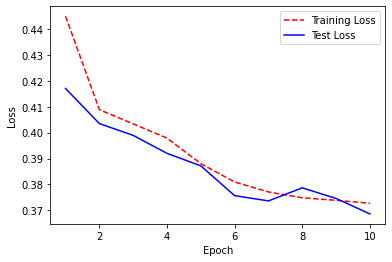

In [ ]:
# Get training and test loss histories
training_loss = h1.history['loss']
test_loss = h1.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

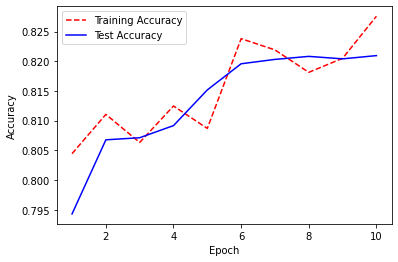

In [ ]:
# Get training and test loss histories
train_accuracy=h1.history['val_accuracy']
test_accuracy=h1.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

#SVM with different Kernels

In [ ]:
svclassifier1 = SVC(kernel='rbf')

In [ ]:
svclassifier1.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svclassifier1.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85    162414
         1.0       0.81      0.67      0.73    104328

    accuracy                           0.81    266742
   macro avg       0.81      0.78      0.79    266742
weighted avg       0.81      0.81      0.80    266742



#Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 0,max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[142002  20412]
 [ 32508  71820]]


In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8016060462919226


#KNN Model

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN_prediction = KNN_model.predict(x_test)

In [ ]:
print(accuracy_score(KNN_prediction, y_test))

0.9971658006613132


In [ ]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    161910
         1.0       1.00      0.99      1.00    104832

    accuracy                           1.00    266742
   macro avg       1.00      1.00      1.00    266742
weighted avg       1.00      1.00      1.00    266742



In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
KNN_prediction = KNN_model.predict(x_test)

In [ ]:
print(accuracy_score(KNN_prediction, y_test))

0.9971658006613132


In [ ]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    162162
         1.0       1.00      1.00      1.00    104580

    accuracy                           1.00    266742
   macro avg       1.00      1.00      1.00    266742
weighted avg       1.00      1.00      1.00    266742



#Feature Selection

##Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
importances=mutual_info_classif(x_train,y_train)
importances

array([0.01833259, 0.        , 0.06393163, 0.00094865, 0.00587642,
       0.0026249 , 0.01245414, 0.        , 0.00815282, 0.00203607,
       0.00509978, 0.02000516, 0.06628315, 0.03125868, 0.22310923,
       0.00639131, 0.16491304, 0.0222457 , 0.06137246])

In [ ]:
importances=pd.Series(importances)
importances.index=x_train.columns
importances.sort_values(ascending=False)

feature 15    0.223109
feature 17    0.164913
feature 13    0.066283
feature 3     0.063932
feature 19    0.061372
feature 14    0.031259
feature 18    0.022246
feature 12    0.020005
feature 1     0.018333
feature 7     0.012454
feature 9     0.008153
feature 16    0.006391
feature 5     0.005876
feature 11    0.005100
feature 6     0.002625
feature 10    0.002036
feature 4     0.000949
feature 2     0.000000
feature 8     0.000000
dtype: float64

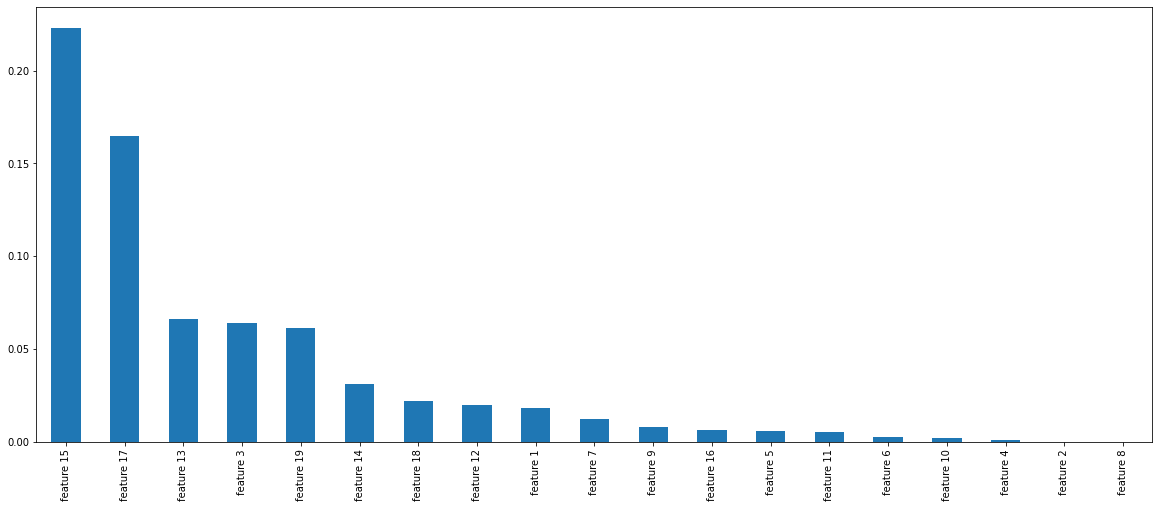

In [ ]:
importances.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['feature 3', 'feature 13', 'feature 15', 'feature 17', 'feature 19'], dtype='object')

##Chi-square Test

In [ ]:
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)
f_p_values

(array([8.36603879e+03, 9.68221548e+00, 2.98341616e+04, 9.23389132e+02,
        3.22343833e+03, 9.41613327e+02, 2.47989488e+03, 5.30027209e+00,
        3.77498993e+03, 5.05935174e+02, 8.46823776e+02, 9.42464285e+03,
        2.98879211e+04, 1.40798969e+04, 1.32278975e+06, 3.53511206e+03,
        9.16762223e+02, 1.05894647e+04, 2.78885273e+04]),
 array([0.00000000e+000, 1.86060144e-003, 0.00000000e+000, 8.07934693e-203,
        0.00000000e+000, 8.82689205e-207, 0.00000000e+000, 2.13220934e-002,
        0.00000000e+000, 4.85972055e-112, 3.56521377e-186, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.22818904e-201, 0.00000000e+000, 0.00000000e+000]))

In [ ]:
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

feature 1      0.000000e+00
feature 2      1.860601e-03
feature 3      0.000000e+00
feature 4     8.079347e-203
feature 5      0.000000e+00
feature 6     8.826892e-207
feature 7      0.000000e+00
feature 8      2.132209e-02
feature 9      0.000000e+00
feature 10    4.859721e-112
feature 11    3.565214e-186
feature 12     0.000000e+00
feature 13     0.000000e+00
feature 14     0.000000e+00
feature 15     0.000000e+00
feature 16     0.000000e+00
feature 17    2.228189e-201
feature 18     0.000000e+00
feature 19     0.000000e+00
dtype: float64

In [ ]:
p_values.sort_index(ascending=False)

feature 9      0.000000e+00
feature 8      2.132209e-02
feature 7      0.000000e+00
feature 6     8.826892e-207
feature 5      0.000000e+00
feature 4     8.079347e-203
feature 3      0.000000e+00
feature 2      1.860601e-03
feature 19     0.000000e+00
feature 18     0.000000e+00
feature 17    2.228189e-201
feature 16     0.000000e+00
feature 15     0.000000e+00
feature 14     0.000000e+00
feature 13     0.000000e+00
feature 12     0.000000e+00
feature 11    3.565214e-186
feature 10    4.859721e-112
feature 1      0.000000e+00
dtype: float64

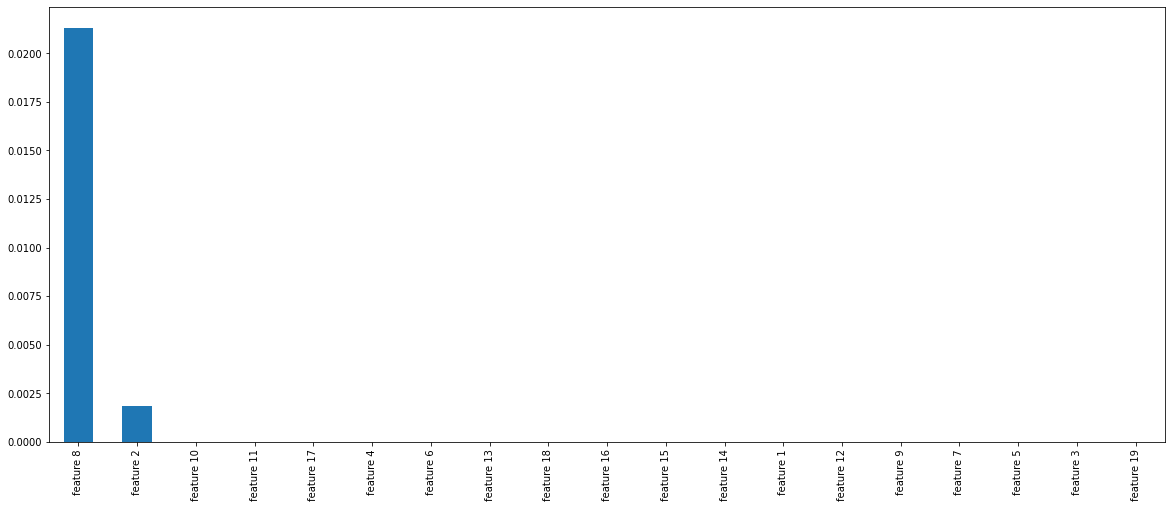

In [ ]:
p_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

##Forward Feature Selection

In [ ]:
classifier = LogisticRegression(random_state = 0,max_iter=1000)
sfs1 = sfs(classifier, n_features_to_select=10,direction='forward')

In [ ]:
sfs1.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=0),
                          n_features_to_select=10)

In [ ]:
sfs1.get_feature_names_out(['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19'])

array(['feature 1', 'feature 5', 'feature 8', 'feature 9', 'feature 10',
       'feature 12', 'feature 13', 'feature 15', 'feature 18',
       'feature 19'], dtype=object)

In [ ]:
# # feat_names = list(sfs1.k_feature_names_)
# print(feat_names)
# # sfs1.get_support()
# print(sfs1.get_feature_names_out(input_features=[['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19']]))

In [ ]:
classifier = GaussianNB()
sfs2 = sfs(classifier, n_features_to_select=10,direction='forward')

In [ ]:
sfs2.fit(x_train,y_train)

SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select=10)

In [ ]:
sfs2.get_support()

array([False,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False])

In [ ]:
sfs2.get_feature_names_out(['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19'])

array(['feature 2', 'feature 7', 'feature 8', 'feature 9', 'feature 11',
       'feature 12', 'feature 13', 'feature 14', 'feature 15',
       'feature 17'], dtype=object)

In [ ]:
classifier=RandomForestClassifier(n_estimators=1000)
sfs3 = sfs(classifier, n_features_to_select=3,direction='forward')

In [ ]:
sfs3.fit(x_train,y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=1000),
                          n_features_to_select=3)

In [ ]:
sfs3.get_feature_names_out(['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19'])

array(['feature 7', 'feature 15', 'feature 17'], dtype=object)

##Backward Feature Selection technique

In [ ]:
classifier = LogisticRegression(random_state = 0,max_iter=1000)
s1 = sfs(classifier, n_features_to_select=10,direction='backward')

In [ ]:
s1.fit(x_train,y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(max_iter=1000,
                                                       random_state=0),
                          n_features_to_select=10)

In [ ]:
s1.get_feature_names_out(['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19'])

array(['feature 1', 'feature 6', 'feature 7', 'feature 9', 'feature 12',
       'feature 13', 'feature 15', 'feature 16', 'feature 17',
       'feature 18'], dtype=object)

In [ ]:
classifier = GaussianNB()
s2 = sfs(classifier, n_features_to_select=10,direction='backward')

In [ ]:
s2.fit(x_train,y_train)

SequentialFeatureSelector(direction='backward', estimator=GaussianNB(),
                          n_features_to_select=10)

In [ ]:
s2.get_feature_names_out(['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19'])

array(['feature 1', 'feature 5', 'feature 9', 'feature 10', 'feature 11',
       'feature 12', 'feature 13', 'feature 14', 'feature 15',
       'feature 17'], dtype=object)

In [ ]:
classifier=RandomForestClassifier(n_estimators=1000)
s3 = sfs(classifier, n_features_to_select=10,direction='backward')

In [ ]:
s3.fit(x_train,y_train)

NameError: ignored

In [ ]:
s3.get_feature_names_out(['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10','feature 11','feature 12','feature 13','feature 14','feature 15','feature 16','feature 17','feature 18','feature 19'])

#Classifiers on Feature Selection Process and Statistical Values

##Forward Feature Selection of Logistic Regression

###Forward Feature Selection using Logistic Regression

In [ ]:
feat=['feature 1', 'feature 5', 'feature 8', 'feature 9', 'feature 10','feature 12', 'feature 13', 'feature 15', 'feature 18','feature 19']
ip=[]
no_of_features=[]
accuracy=[]
f1=[]
precision=[]
recall=[]
for i in range(0,10):
  ip.append(feat[i])
  no_of_features.append(i+1)
  X_dataframe=x_train[ip]
  classifier = LogisticRegression(random_state = 0,max_iter=1000)
  classifier.fit(X_dataframe, y_train)
  X_test=x_test[ip]
  y_pred = classifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  f=f1_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred)
  accuracy.append(acc)
  f1.append(f)
  precision.append(pre)
  recall.append(rec)

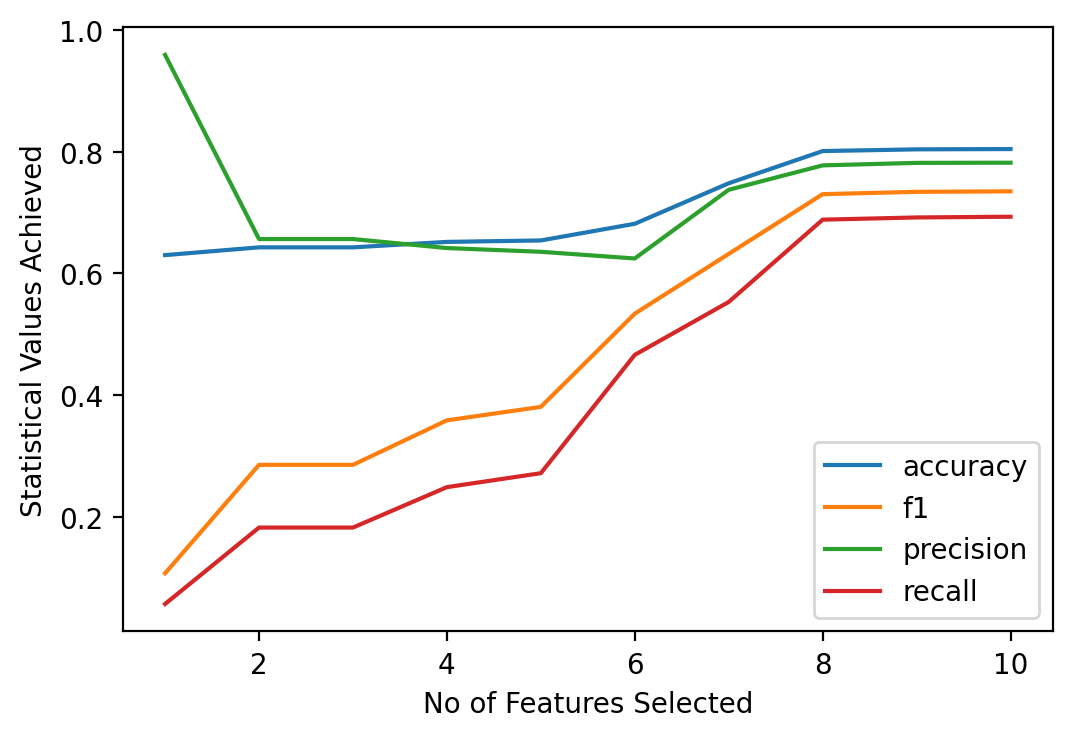

In [ ]:
# accuracy
plt.figure(dpi=200)
plt.xlabel("No of Features Selected")
plt.ylabel("Statistical Values Achieved")
plt.plot(no_of_features,accuracy)
plt.plot(no_of_features,f1)
plt.plot(no_of_features,precision)
plt.plot(no_of_features,recall)
plt.legend(['accuracy','f1','precision','recall'])
plt.show()

###Gaussian Naive Bayes

In [ ]:
feat=['feature 1', 'feature 5', 'feature 8', 'feature 9', 'feature 10','feature 12', 'feature 13', 'feature 15', 'feature 18','feature 19']
ip=[]
no_of_features=[]
accuracy=[]
f1=[]
precision=[]
recall=[]
for i in range(0,10):
  ip.append(feat[i])
  no_of_features.append(i+1)
  X_dataframe=x_train[ip]
  model=GaussianNB()
  model.fit(X_dataframe,y_train)
  X_test=x_test[ip]
  # y_pred = classifier.predict(X_test)
  acc=model.score(X_test,y_test)
  # acc=accuracy_score(y_test, y_pred)
  # f=f1_score(y_test, y_pred)
  # rec = recall_score(y_test, y_pred)
  # pre = precision_score(y_test, y_pred)
  accuracy.append(acc)
  # f1.append(f)
  # precision.append(pre)
  # recall.append(rec)
  # accuracy.append(acc)

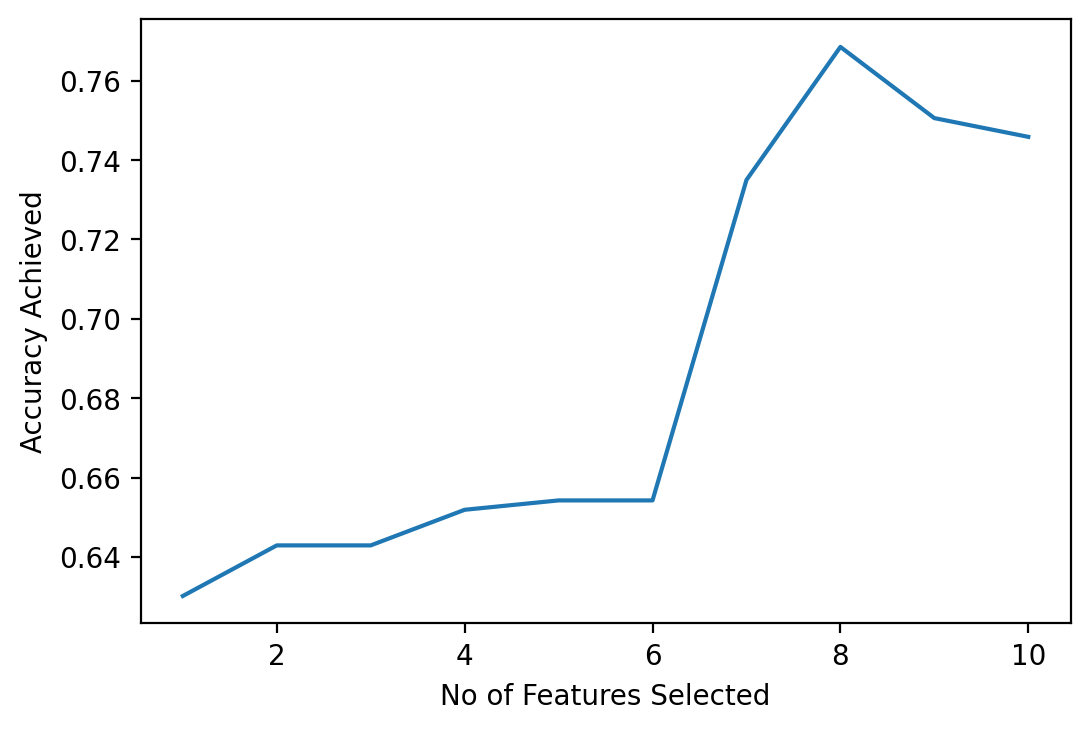

In [ ]:
# accuracy
plt.figure(dpi=200)
plt.xlabel("No of Features Selected")
plt.ylabel("Accuracy Achieved")
plt.plot(no_of_features,accuracy)
plt.show()

### SVM

In [ ]:
feat=['feature 1', 'feature 5', 'feature 8', 'feature 9', 'feature 10','feature 12', 'feature 13', 'feature 15', 'feature 18','feature 19']
ip=[]
no_of_features=[]
accuracy=[]
f1=[]
precision=[]
recall=[]
for i in range(0,10):
  ip.append(feat[i])
  no_of_features.append(i+1)
  X_dataframe=x_train[ip]
  svclassifier1 = SVC(kernel='rbf')
  svclassifier1.fit(X_dataframe, y_train)
  X_test=x_test[ip]
  y_pred = svclassifier1.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  f=f1_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred)
  accuracy.append(acc)
  f1.append(f)
  precision.append(pre)
  recall.append(rec)

In [ ]:
# accuracy
plt.figure(dpi=200)
plt.xlabel("No of Features Selected")
plt.ylabel("Statistical Values Achieved")
plt.plot(no_of_features,accuracy)
plt.plot(no_of_features,f1)
plt.plot(no_of_features,precision)
plt.plot(no_of_features,recall)
plt.legend(['accuracy','f1','precision','recall'])
plt.show()

###Deep Neural Network

In [ ]:
def func(no_of_features):
  input_layer=no_of_features
  output_layer=1
  hidden_layer=8

  model=tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(no_of_features,)),
                            tf.keras.layers.Dense(hidden_layer,activation='relu'),
                            tf.keras.layers.Dense(hidden_layer,activation='relu'),
                            tf.keras.layers.Dense(output_layer,activation='sigmoid'),
                            ])

  model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])
  number_of_epochs=10
  return model

In [ ]:
feat=['feature 1', 'feature 5', 'feature 8', 'feature 9', 'feature 10','feature 12', 'feature 13', 'feature 15', 'feature 18','feature 19']
ip=[]
no_of_features=[]
accuracy=[]
f1=[]
precision=[]
recall=[]
for i in range(0,10):
  ip.append(feat[i])
  no_of_features.append(i+1)
  X_dataframe=x_train[ip]
  model=func(i+1)
  
  X_test=x_test[ip]
  h=model.fit(X_dataframe,y_train,epochs=10,verbose=2,validation_data=(X_test,y_test))
  acc=h.history['val_accuracy'][-1]
  accuracy.append(acc)

Epoch 1/10
8336/8336 - 33s - loss: 0.6523 - accuracy: 0.6301 - val_loss: 0.6516 - val_accuracy: 0.6301 - 33s/epoch - 4ms/step
Epoch 2/10
8336/8336 - 20s - loss: 0.6516 - accuracy: 0.6301 - val_loss: 0.6516 - val_accuracy: 0.6301 - 20s/epoch - 2ms/step
Epoch 3/10
8336/8336 - 17s - loss: 0.6516 - accuracy: 0.6301 - val_loss: 0.6516 - val_accuracy: 0.6301 - 17s/epoch - 2ms/step
Epoch 4/10
8336/8336 - 19s - loss: 0.6516 - accuracy: 0.6301 - val_loss: 0.6519 - val_accuracy: 0.6301 - 19s/epoch - 2ms/step
Epoch 5/10
8336/8336 - 18s - loss: 0.6516 - accuracy: 0.6301 - val_loss: 0.6516 - val_accuracy: 0.6301 - 18s/epoch - 2ms/step
Epoch 6/10
8336/8336 - 19s - loss: 0.6516 - accuracy: 0.6301 - val_loss: 0.6516 - val_accuracy: 0.6301 - 19s/epoch - 2ms/step
Epoch 7/10
8336/8336 - 18s - loss: 0.6516 - accuracy: 0.6301 - val_loss: 0.6516 - val_accuracy: 0.6301 - 18s/epoch - 2ms/step
Epoch 8/10
8336/8336 - 19s - loss: 0.6516 - accuracy: 0.6301 - val_loss: 0.6515 - val_accuracy: 0.6301 - 19s/epoch - 2

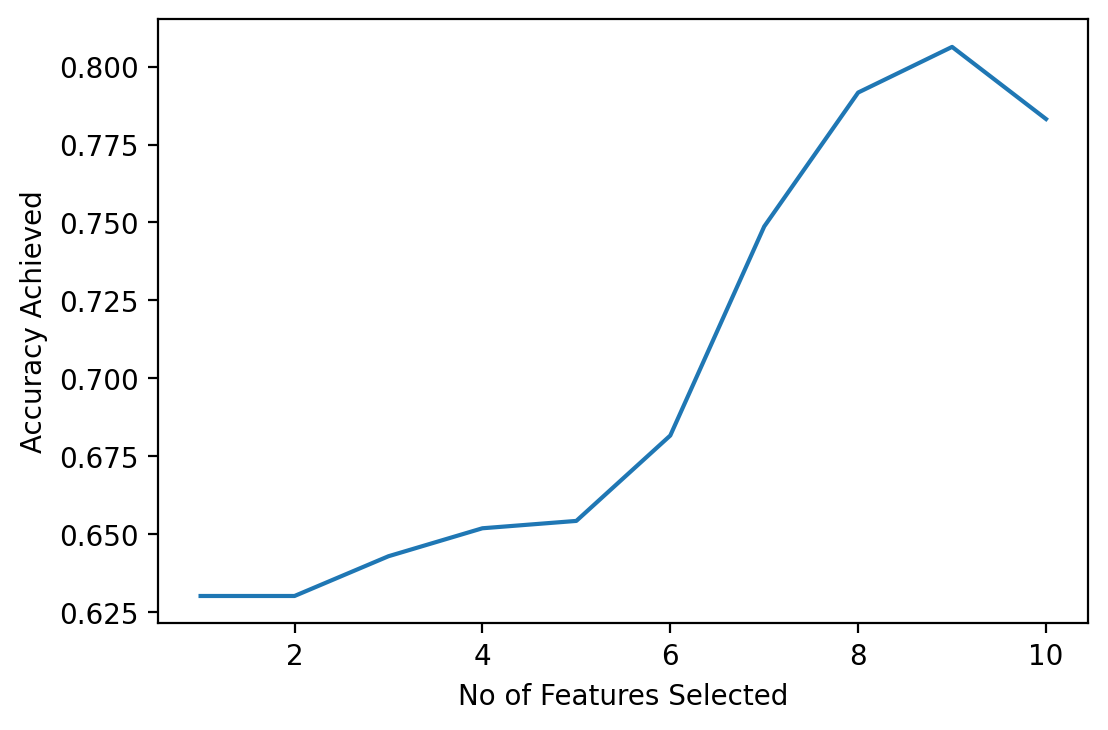

In [ ]:
# accuracy
plt.figure(dpi=200)
plt.xlabel("No of Features Selected")
plt.ylabel("Accuracy Achieved")
plt.plot(no_of_features,accuracy)
plt.show()